# PDP Comparison with *X48* dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dalex as dx
import copy
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from RashomonSetAnalyser import RashomonSetAnalyser
import pickle
import xgboost as xgb

In [2]:
results = np.load('results.npy', allow_pickle=True)
results.sort_values(by = 'mean_test_score', inplace = True, ascending = False)
results.reset_index(inplace = True)

In [3]:
best_model = results.iloc[0].params

In [4]:
rashomon = RashomonSetAnalyser()

In [5]:
X = np.load("X48.npy")
column_names = np.load('column_names.npy', allow_pickle = True)
X = pd.DataFrame(data = X, columns = column_names)
with open('y.npy', 'rb') as f:
    labels = pickle.load(f)
    
task = [yy[0] for yy in labels]
y = np.array(task)

def model_learn(X, y, params):
    model = xgb.XGBClassifier(objective = 'binary:logistic', n_jobs = -1, eval_metric = 'auc', use_label_encoder = False, seed = 123)
    model.set_params(**params)
    return model.fit(X, y)

In [6]:
from pathlib import Path

models_path = Path("top_eight_models.npy")
base_model_path = Path("base_model.npy")

best_models_tab = []

if models_path.exists() and base_model_path.exists():
    with open('top_eight_models.npy', 'rb') as f:
        models = pickle.load(f)
    
    with open('base_model.npy', 'rb') as f:
        base_model = pickle.load(f)
        
    best_models_tab.append(base_model)
    best_models_tab = best_models_tab + models
    
else:
    for i in range(10):
        best_models_tab.append(model_learn(X, y, results.iloc[i].params))

In [7]:
rashomon.set_base_model(best_models_tab[0])
rashomon.set_models(best_models_tab[1:])

In [8]:
answear = rashomon.pdp_comparator(X, y)
answear.head()

,colname,model0,model1,model2,model3,model4,model5,model6,model7,model8
0,albumin_min,0.895708,1.094565,1.101840,0.639512,0.796659,0.132743,0.520099,0.811134,0.312614
1,bicarbonate_min,0.823801,0.984589,1.078355,0.528898,0.841015,0.206143,0.380499,1.014646,0.592612
2,bun_min,0.776521,0.472627,0.804022,0.629305,0.489900,0.039225,0.189107,0.600329,0.511266
3,calcium_min,1.430521,2.199248,2.140283,1.534680,1.547932,1.145182,1.136423,1.589801,1.202206
4,creatinine_min,0.568789,1.775589,1.311487,0.655352,0.605490,0.560761,0.166061,0.644348,0.498596


### General results

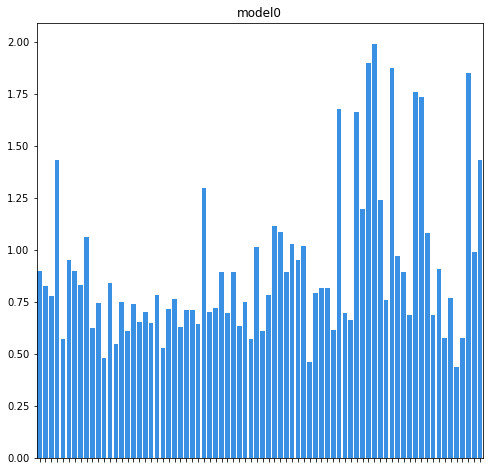

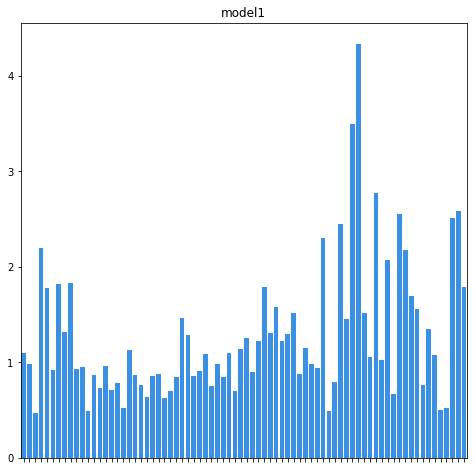

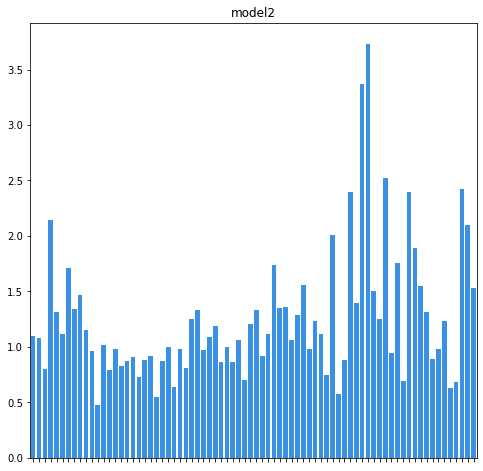

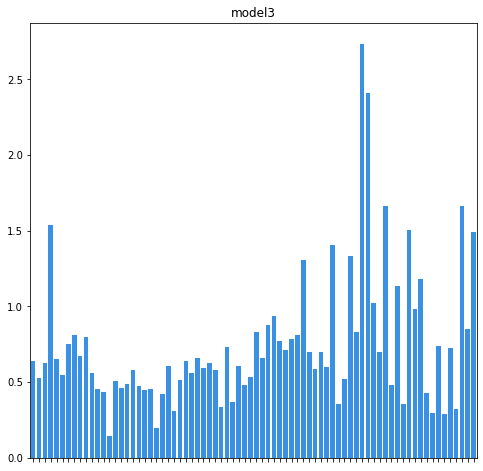

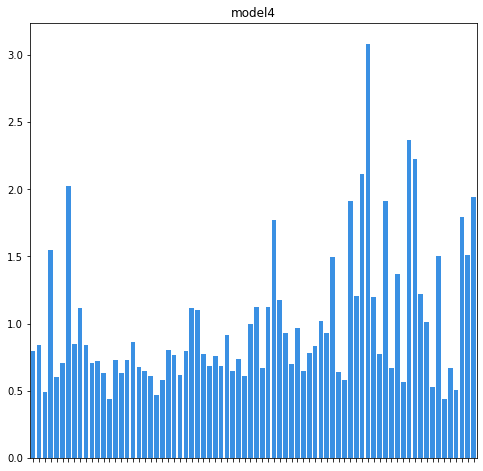

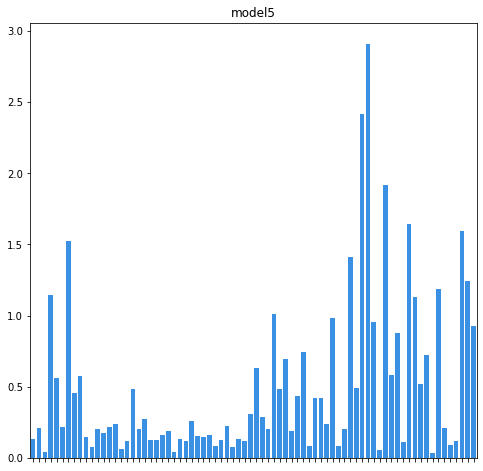

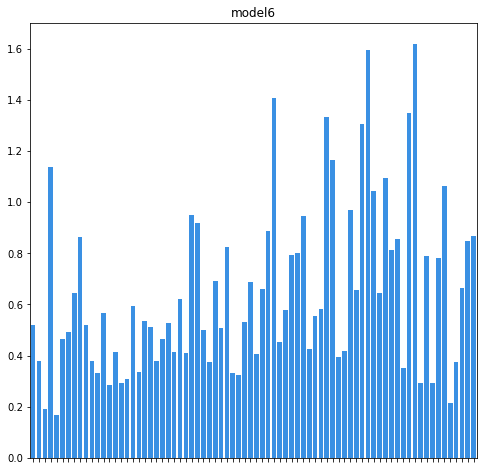

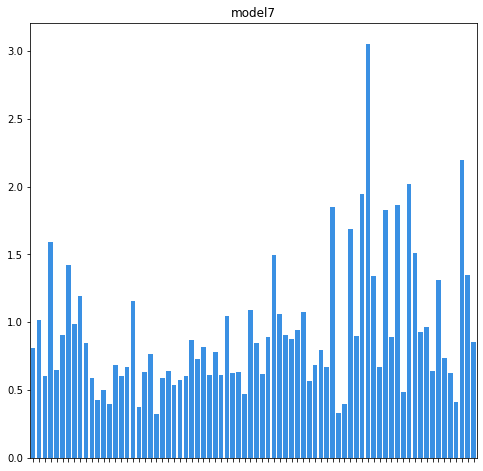

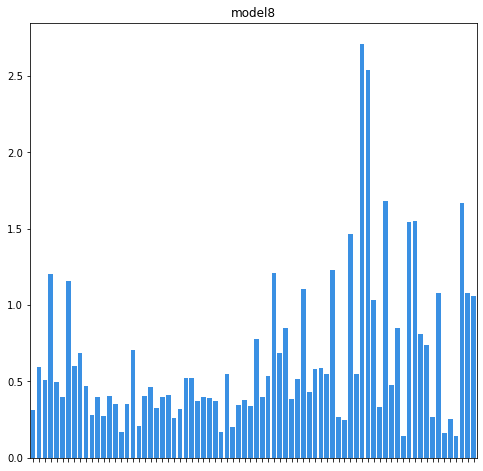

In [9]:
rashomon.show_results()

We wszystkich przypadkach wyróżnia się jedna zmienna. Sprawdźmy, która to jest:

In [10]:
answear.iloc[:,1].sort_values(ascending=False)

57    1.991089
56    1.898168
60    1.874091
73    1.850707
64    1.760097
        ...   
13    0.545274
21    0.529697
11    0.482116
46    0.459822
71    0.436831
Name: model0, Length: 76, dtype: float64

In [11]:
answear.iloc[:,2].sort_values(ascending=False)

57    4.339261
56    3.498901
60    2.776189
74    2.584630
64    2.552175
        ...   
17    0.519226
71    0.499612
11    0.489496
52    0.489364
2     0.472627
Name: model1, Length: 76, dtype: float64

In [12]:
answear.iloc[:,3].sort_values(ascending=False)

57    3.733204
56    3.370958
60    2.519572
73    2.423825
64    2.397826
        ...   
24    0.641857
71    0.630797
52    0.571065
21    0.550103
11    0.478293
Name: model2, Length: 76, dtype: float64

In [13]:
answear.iloc[:,4].sort_values(ascending=False)

56    2.736087
57    2.410021
73    1.666495
60    1.660207
3     1.534680
        ...   
24    0.310881
68    0.293000
70    0.288254
21    0.195459
13    0.141518
Name: model3, Length: 76, dtype: float64

In [14]:
answear.iloc[:,0][57]

'albumin_std'

Inna często powtarzająca się zmienna:

In [15]:
answear.iloc[:,0][60]

'calcium_std'

### Sum plots

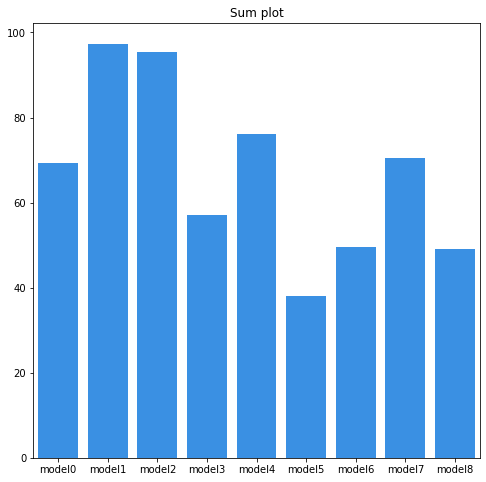

In [16]:
rashomon.sum_plot()

### Boxplots

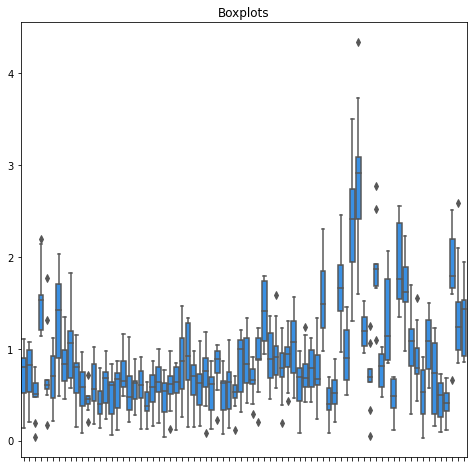

In [17]:
rashomon.boxplots()

### Histograms of calculations

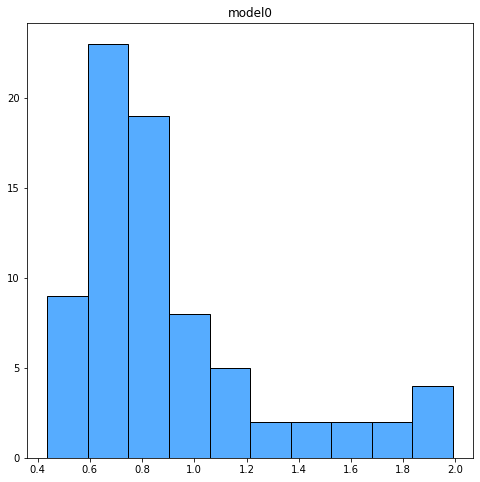

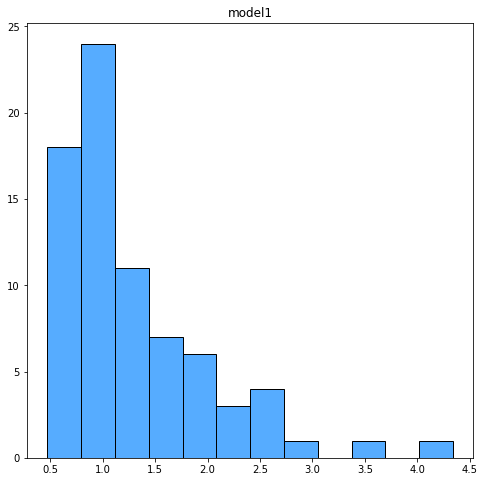

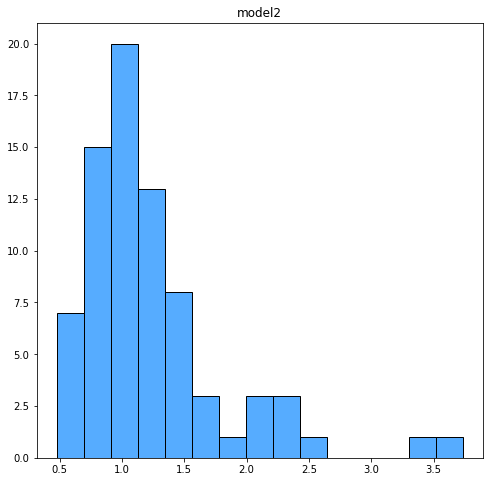

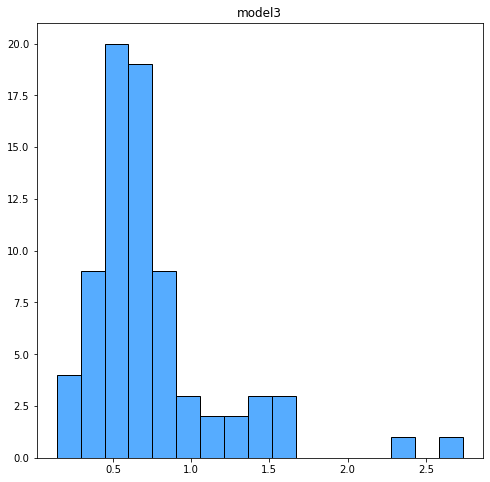

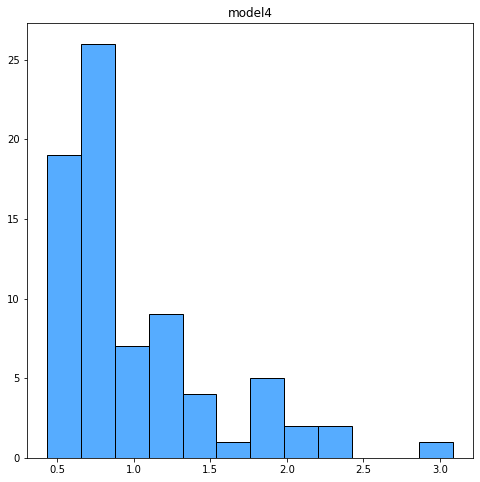

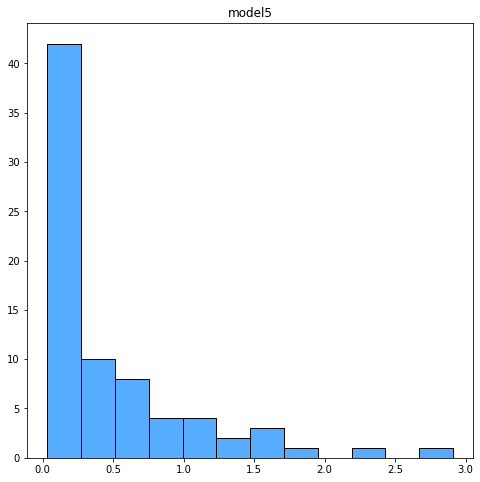

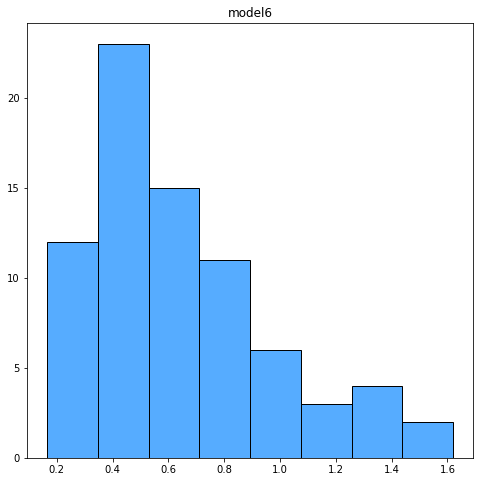

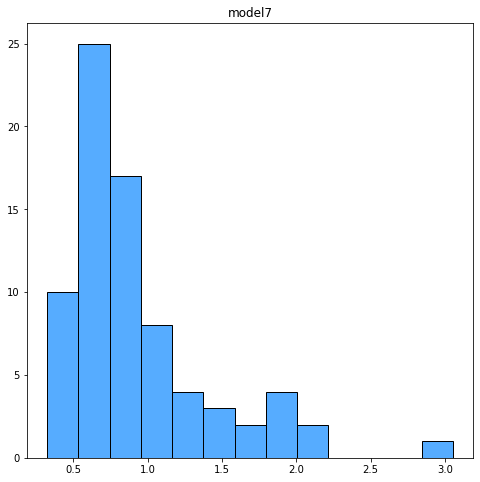

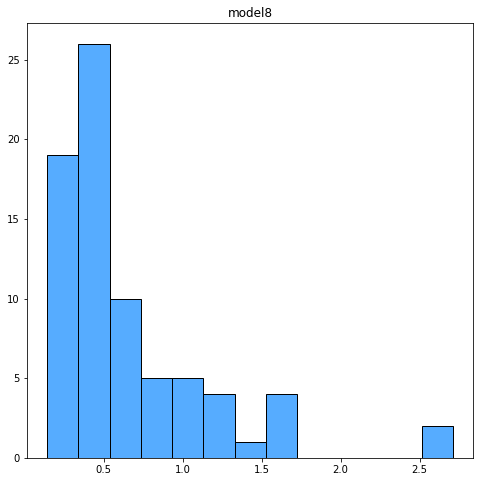

In [18]:
rashomon.histograms()

## Let's look at different metric: *sum*

In [19]:
answear2 = rashomon.pdp_comparator(X, y, metric = 'sum')

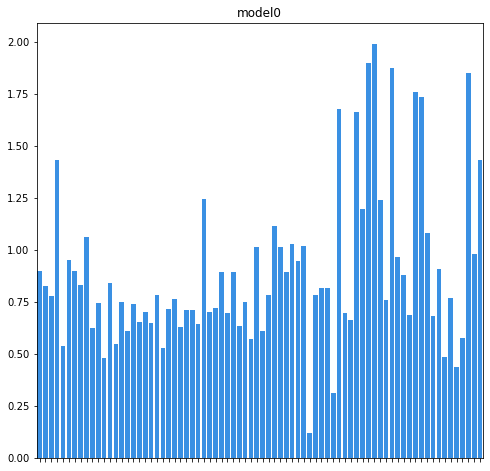

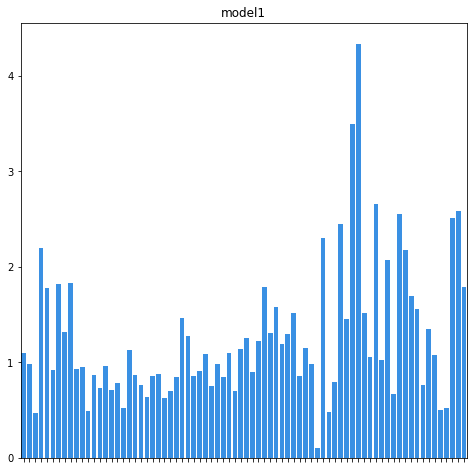

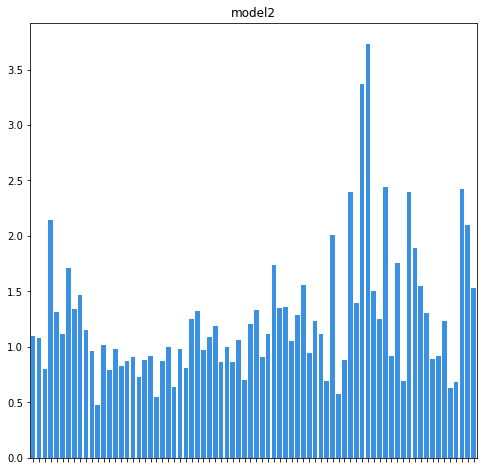

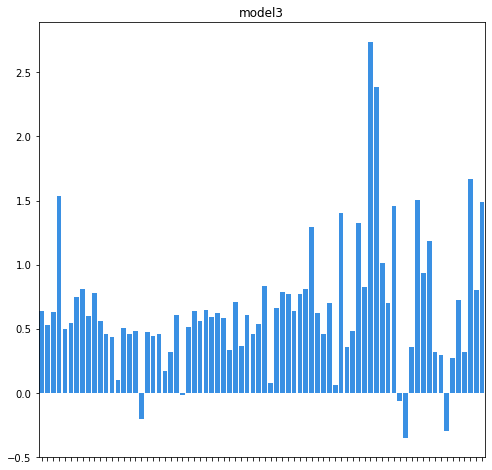

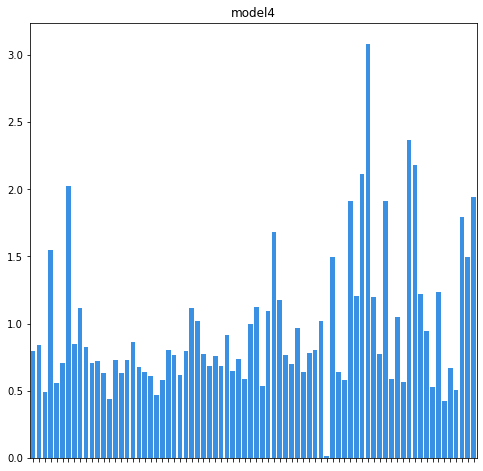

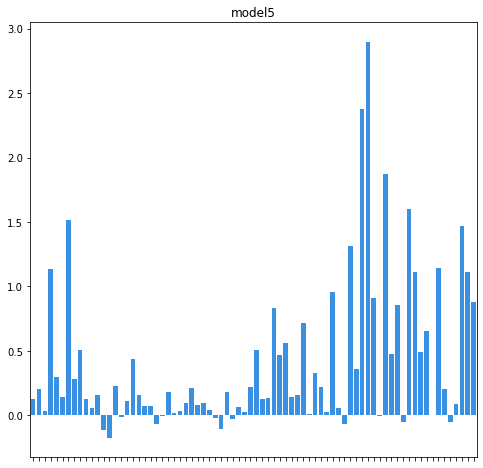

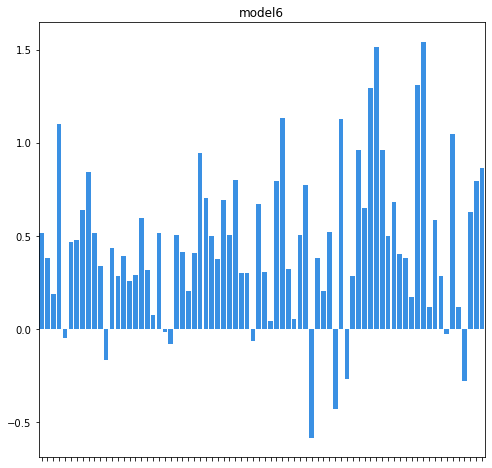

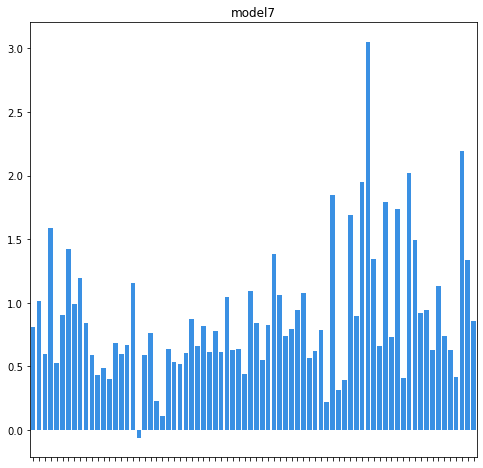

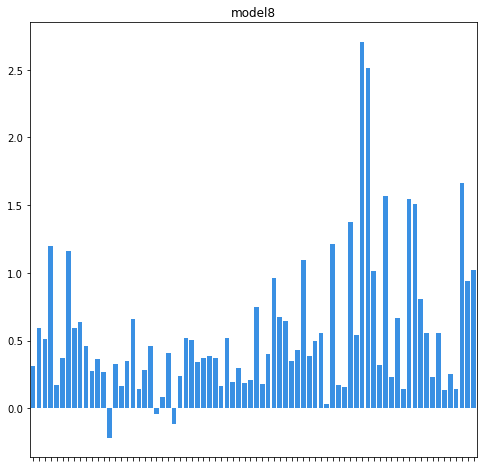

In [20]:
rashomon.show_results()

### Coloring plots above

In [21]:
colors=answear.copy()
i=0
for j in range(answear.shape[1]-1):
    for i in range(answear.shape[0]):
        if(answear2.iloc[i,1+j]>0.5*answear.iloc[i,1+j]):
            colors.iloc[i,1+j]="green"
        elif(answear2.iloc[i,1+j]< -0.5*answear.iloc[i,1+j]):
            colors.iloc[i,1+j]="red"
        else:
            colors.iloc[i,1+j]="gray"

In [22]:
colors.head()

,colname,model0,model1,model2,model3,model4,model5,model6,model7,model8
0,albumin_min,green,green,green,green,green,green,green,green,green
1,bicarbonate_min,green,green,green,green,green,green,green,green,green
2,bun_min,green,green,green,green,green,green,green,green,green
3,calcium_min,green,green,green,green,green,green,green,green,green
4,creatinine_min,green,green,green,green,green,green,gray,green,gray


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


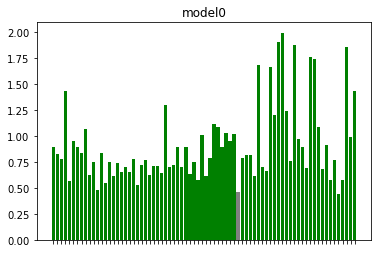

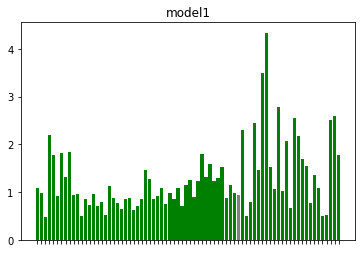

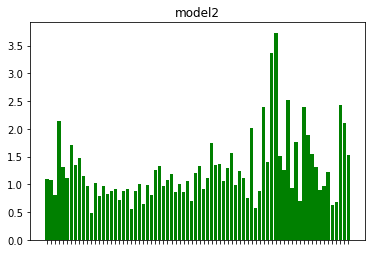

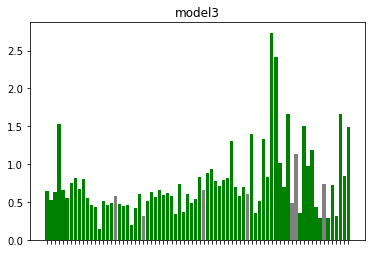

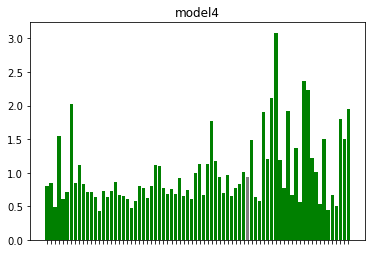

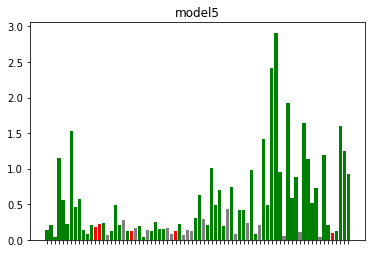

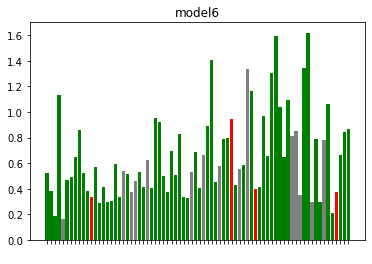

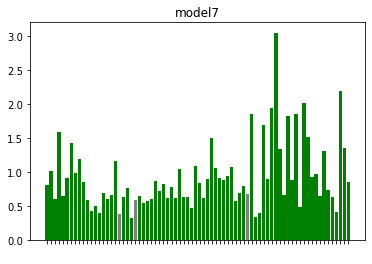

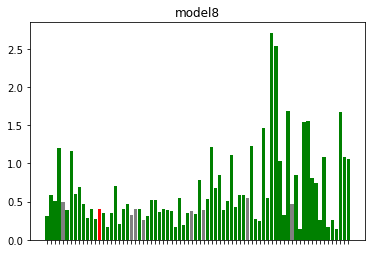

In [23]:
labels=[" "]*answear.shape[0]
for i in range(answear.shape[1]-1):
    fig, ax = plt.subplots()
    plt.bar(x=answear.iloc[:,0],height=answear.iloc[:,1+i],color=colors.iloc[:,1+i])
    ax.set_xticklabels(labels)
    ax.set_title(answear.columns[i+1])
    plt.show()

### Sum plots

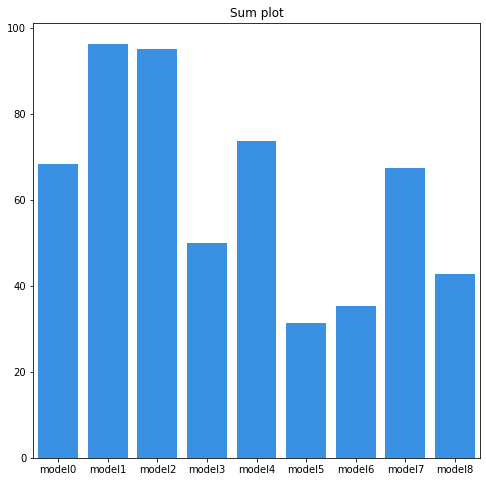

In [24]:
rashomon.sum_plot()

### Boxplots

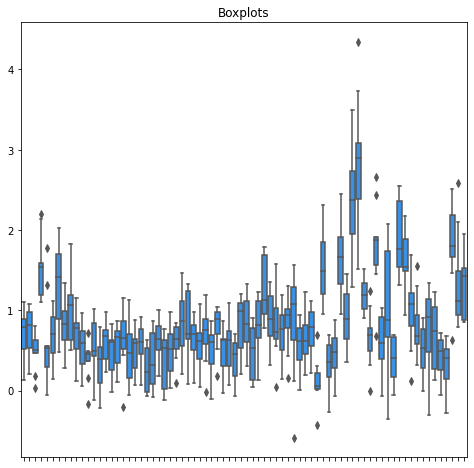

In [25]:
rashomon.boxplots()

### Histograms of calculations

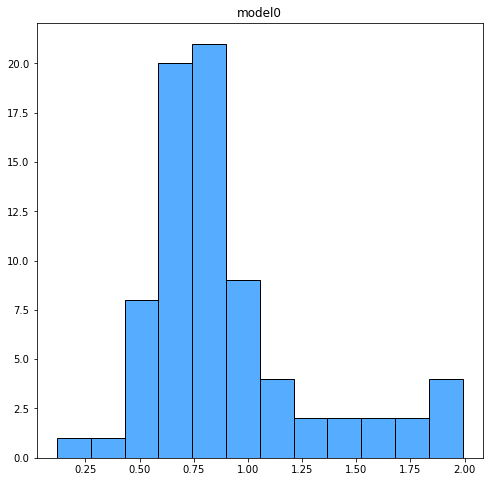

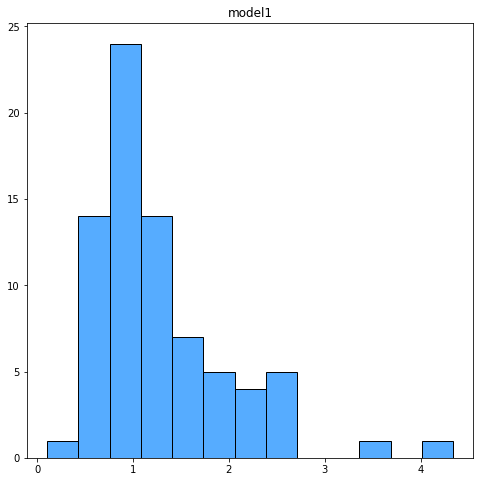

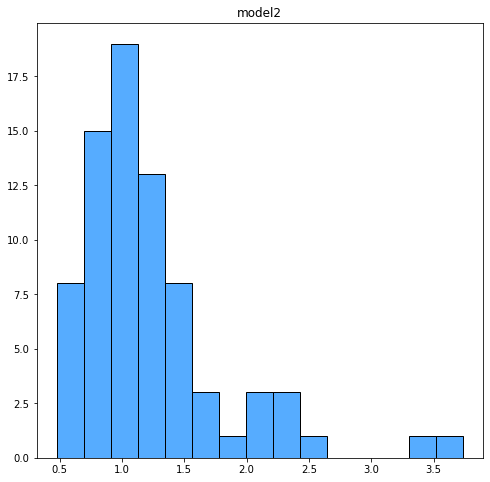

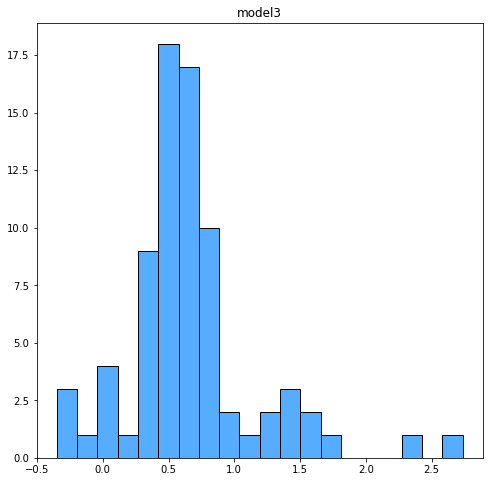

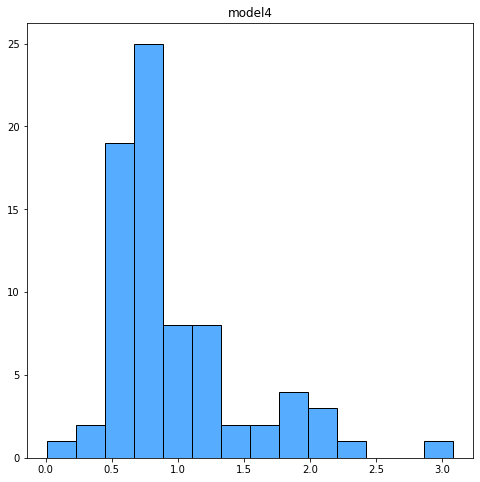

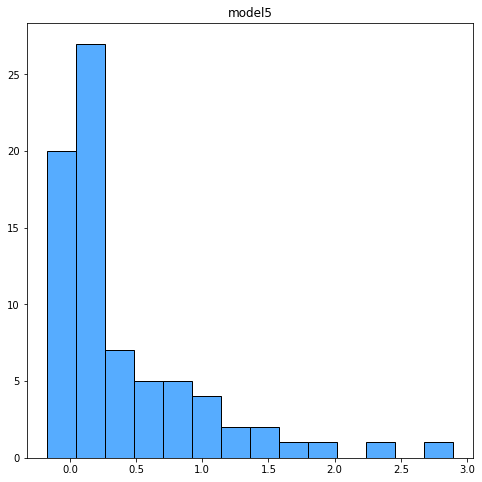

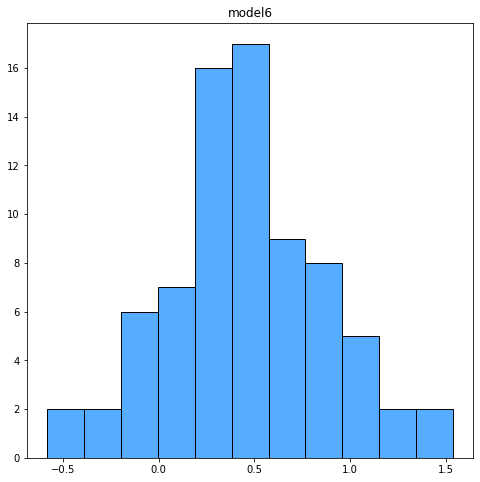

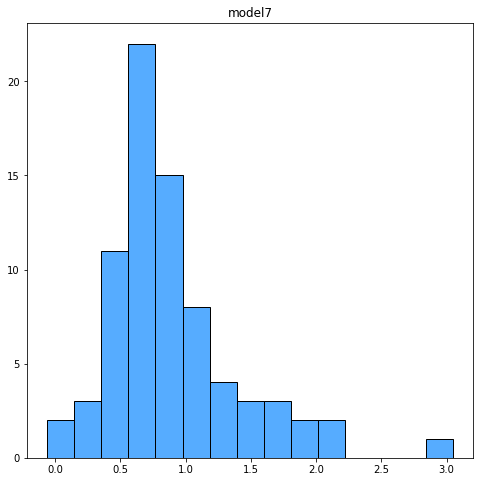

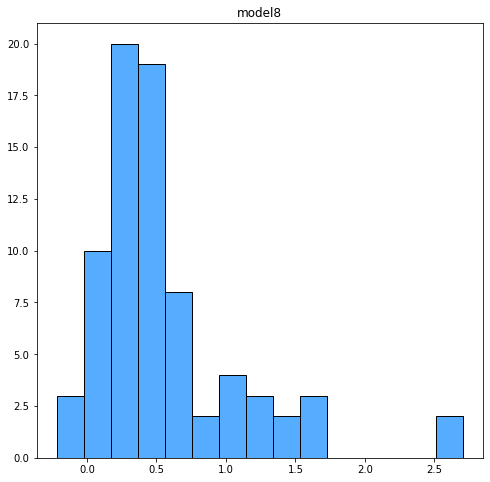

In [26]:
rashomon.histograms()

## Let's look at one more metric: *kurtosis*

In [27]:
answear3 = rashomon.pdp_comparator(X, y, metric = 'kurtosis', calculate_metric_for_base_model = True)

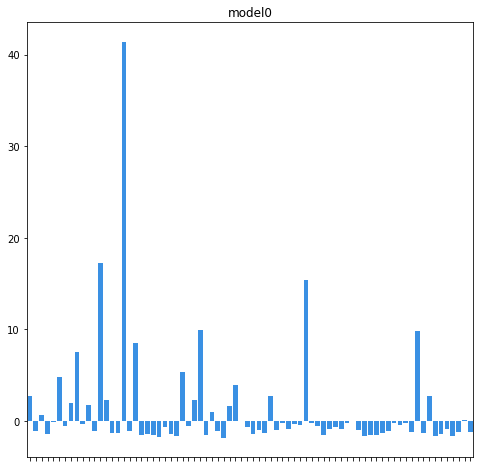

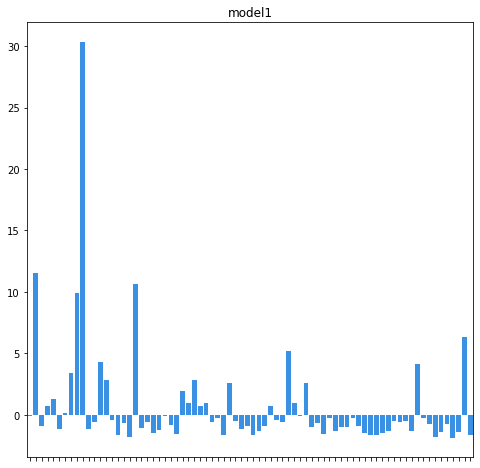

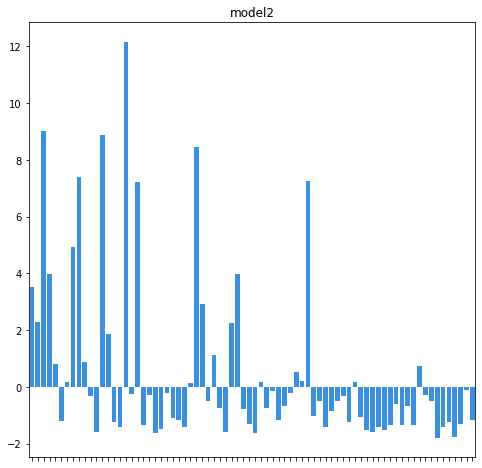

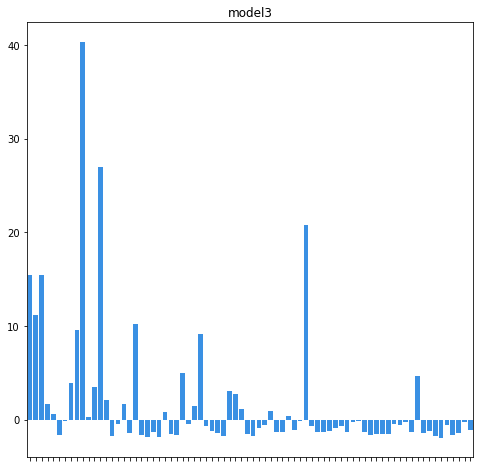

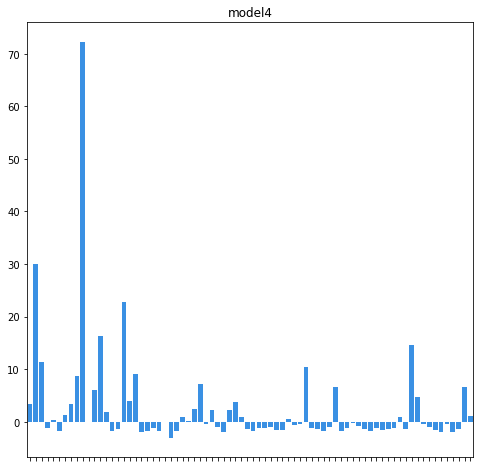

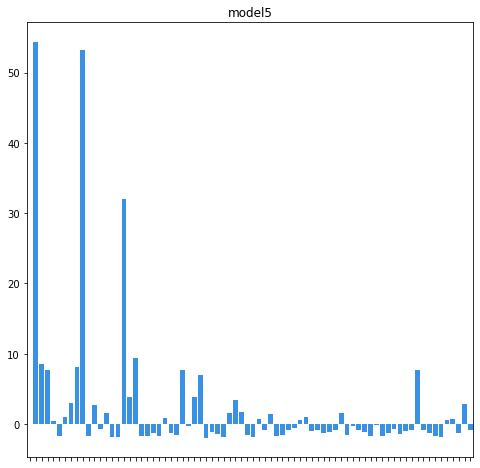

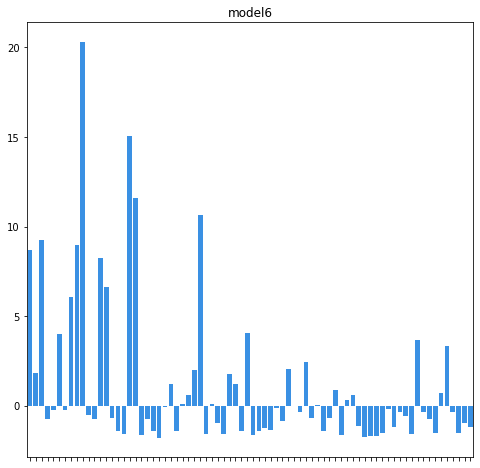

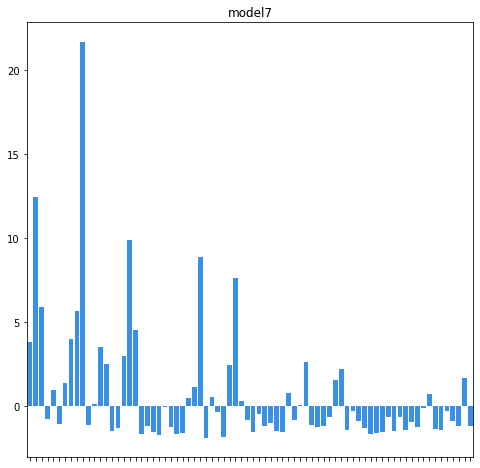

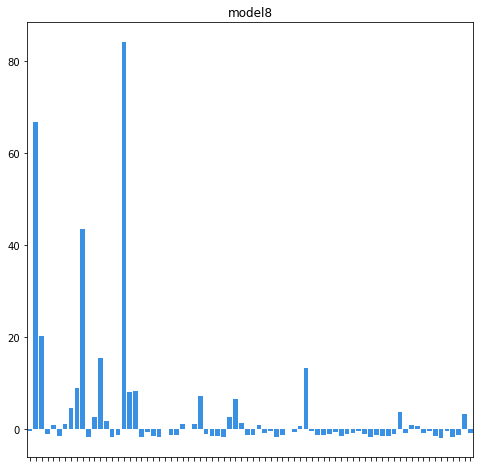

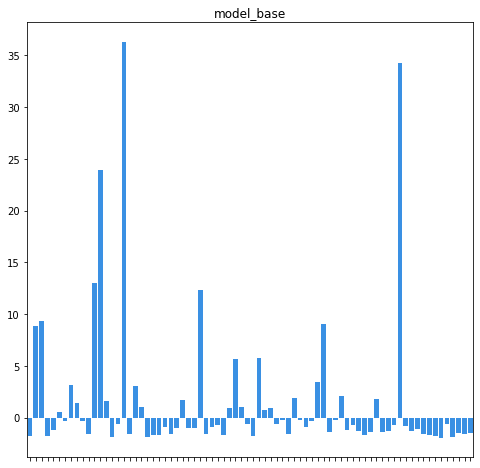

In [28]:
rashomon.show_results()

### Sum plots

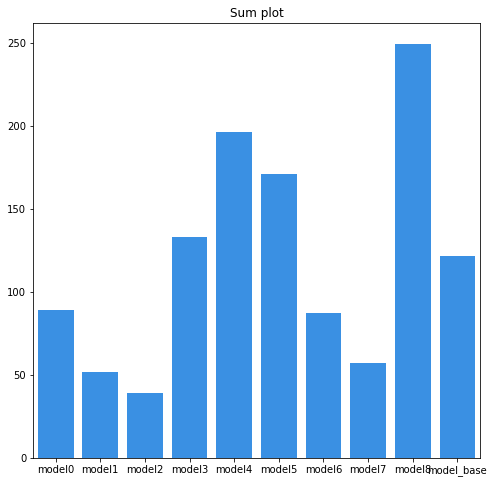

In [29]:
rashomon.sum_plot()

### Boxplots

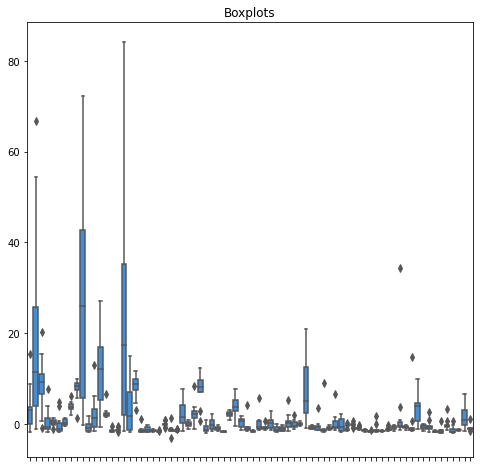

In [30]:
rashomon.boxplots()

### Histograms of calculations

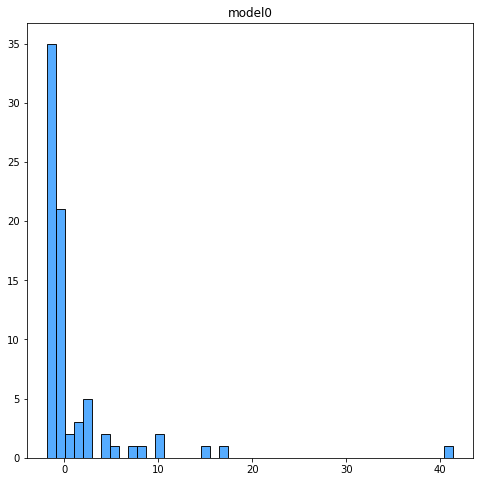

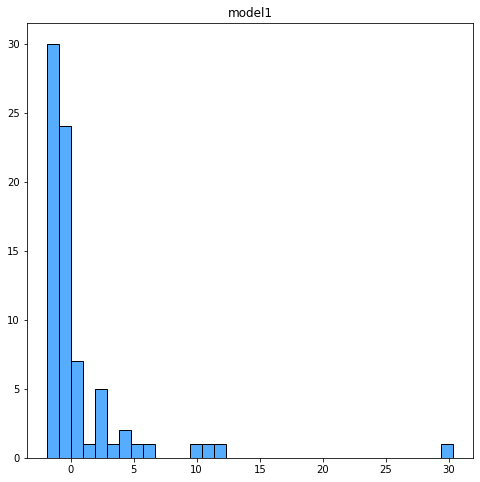

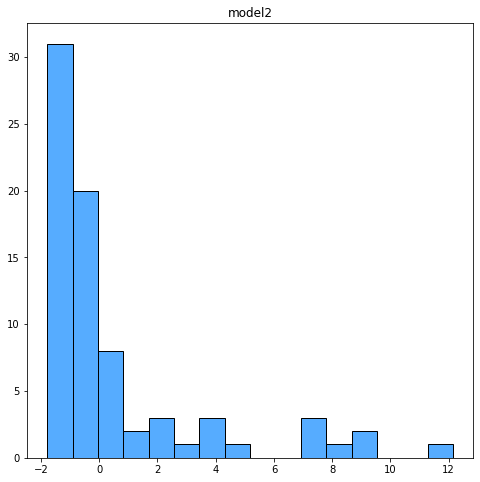

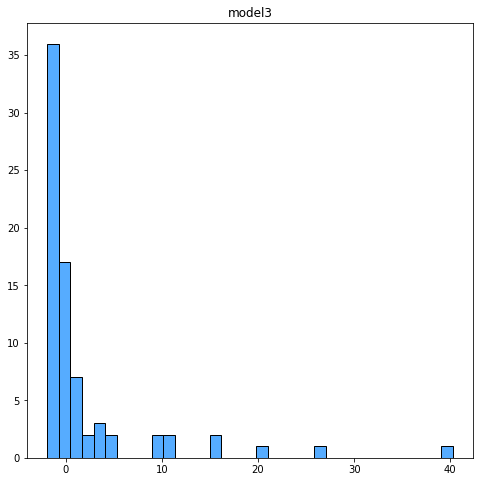

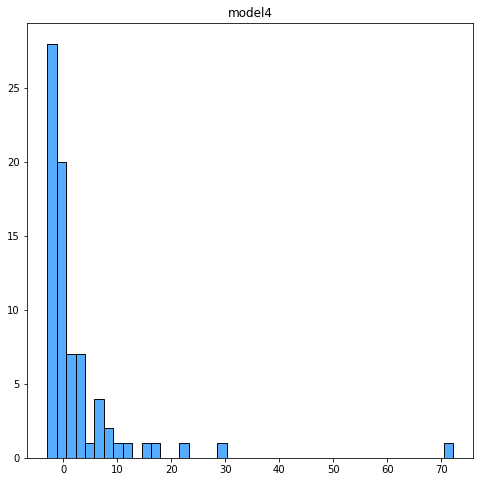

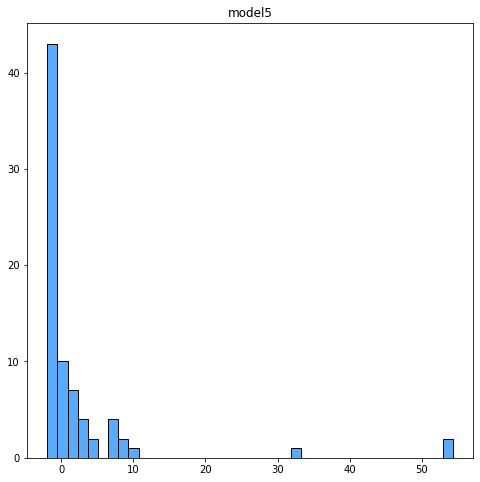

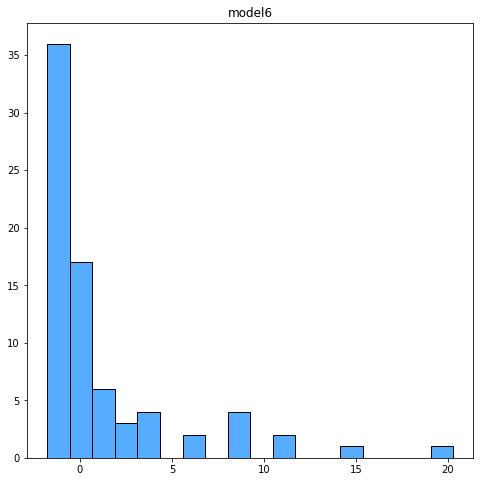

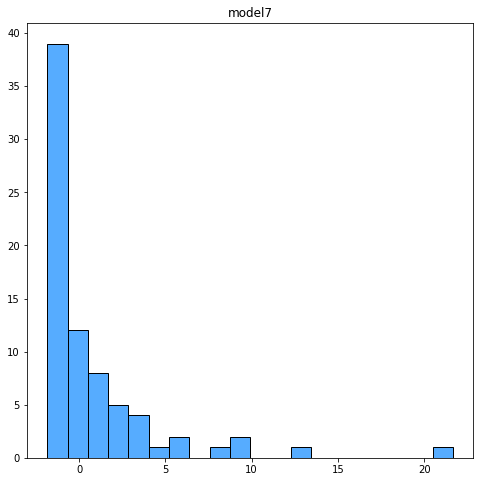

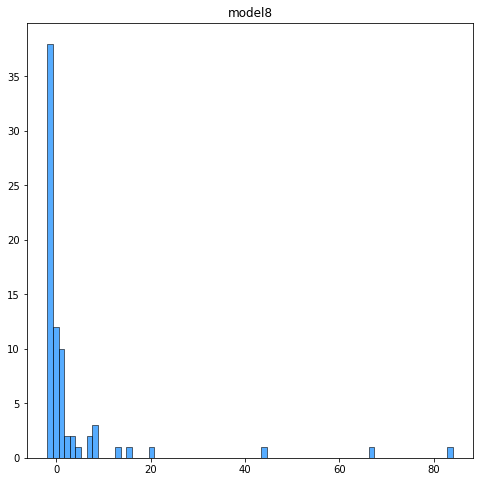

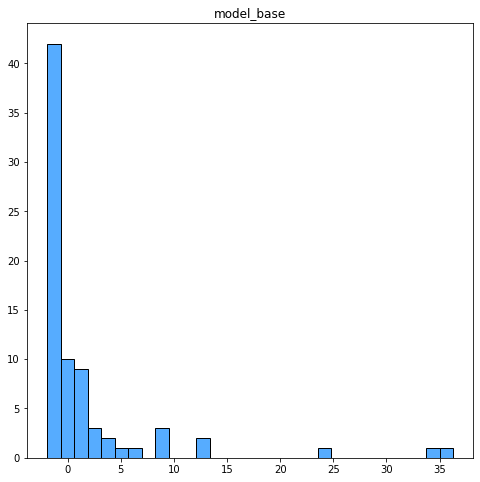

In [31]:
rashomon.histograms()

In [32]:
answear.to_csv('abs_sum.csv', index=False)
answear2.to_csv('sum.csv', index=False)
answear3.to_csv('kurtosis.csv', index=False)

In [33]:
with open('top_eight_models.npy', 'wb') as f:
    pickle.dump(rashomon.models, f)

In [34]:
with open('base_model.npy', 'wb') as f:
    pickle.dump(rashomon.base_model, f)